<h1> Currency Exchange Rate Forecasting using Python </h1>

<h3>Vikas Kumar, Plaksha University </h3>

The currency conversion rate, also known as the exchange rate, holds significant importance as an economic indicator with wide-ranging impacts across various sectors, including import-export businesses, foreign investment, and tourism. <br><br>By scrutinizing historical data and making predictions about future exchange rates, we can acquire valuable insights to assist stakeholders in mitigating risks, optimizing currency conversions, and formulating effective financial strategies.<br> <br>Therefore, if you're seeking knowledge on forecasting currency exchange rates, this article is tailored for you. Within this piece, we will explore the topic of Currency Exchange Rate Forecasting using Python.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
data = pd.read_csv("INR-USD.csv")

print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0
1  2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0
2  2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0
3  2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0
4  2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0


In [5]:
print(data.isnull().sum())

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64


In [6]:
# dropping the missing values
data = data.dropna()

In [7]:
print(data.describe)

<bound method NDFrame.describe of             Date       Open       High        Low      Close  Adj Close  \
0     2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000   
1     2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000   
2     2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002   
3     2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999   
4     2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001   
...          ...        ...        ...        ...        ...        ...   
1011  2023-04-17  81.844803  82.375504  81.844803  82.140900  82.140900   
1012  2023-04-24  82.054802  82.154900  81.603996  81.745399  81.745399   
1013  2023-05-01  81.744797  81.950996  81.616997  81.716103  81.716103   
1014  2023-05-08  81.729797  82.148499  81.673401  81.787102  81.787102   
1015  2023-05-10  82.037003  82.087502  81.884003  81.930000  81.930000   

      Volume  
0        0.0  
1        0.0  
2        0.0  
3    

In [9]:
figure = px.line(data, x="Date", y="Close", title='USD - INR Conversion Rate over the years')
figure.show()

In [10]:
data["Date"] = pd.to_datetime(data["Date"], format = '%Y-%m-%d')
data['Year'] = data['Date'].dt.year
data["Month"] = data["Date"].dt.month
print(data.head())

        Date       Open       High        Low      Close  Adj Close  Volume  \
0 2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0   
1 2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0   
2 2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0   
3 2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0   
4 2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0   

   Year  Month  
0  2003     12  
1  2003     12  
2  2003     12  
3  2003     12  
4  2003     12  


In [16]:
import plotly.graph_objs as go
import plotly.io as pio

# Calculate yearly growth
grouped_data = data.groupby(['Year', 'Month'])
data['Growth'] = (grouped_data['Close'].transform('last') - grouped_data['Close'].transform('first')) / grouped_data['Close'].transform('first') * 100


fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth['Close'],
                     name='Yearly Growth'))

fig.update_layout(title="Yearly Growth of USD - INR Conversion Rate",
                  xaxis_title="Year",
                  yaxis_title="Growth (%)",
                  width=900,
                  height=600)

pio.show(fig)

In [18]:
# Calculate monthly growth
grouped_data = data.groupby(['Year', 'Month'])
data['Growth'] = (grouped_data['Close'].transform('last') - grouped_data['Close'].transform('first')) / grouped_data['Close'].transform('first') * 100


# Group data by Month and calculate average growth
grouped_data = data.groupby('Month').mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data['Month'],
    y=grouped_data['Growth'],
    marker_color=grouped_data['Growth'],
    hovertemplate='Month: %{x}<br>Average Growth: %{y:.2f}%<extra></extra>'
))

fig.update_layout(
    title="Aggregated Monthly Growth of USD - INR Conversion Rate",
    xaxis_title="Month",
    yaxis_title="Average Growth (%)",
    width=900,
    height=600
)

pio.show(fig)

The graph illustrates consistent patterns in the value of USD against INR throughout the year. Specifically, the USD value tends to decline in January and March, followed by a strengthening trend in the second quarter. In August, the USD reaches its highest point against INR, but experiences a subsequent decrease in September. It then demonstrates a rising trend in the last quarter, only to decline again in December.

In [19]:
# using time series forecasting

C:\Users\Plaksha\AppData\Local\Temp\ipykernel_17932\1029362683.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 432x288 with 0 Axes>

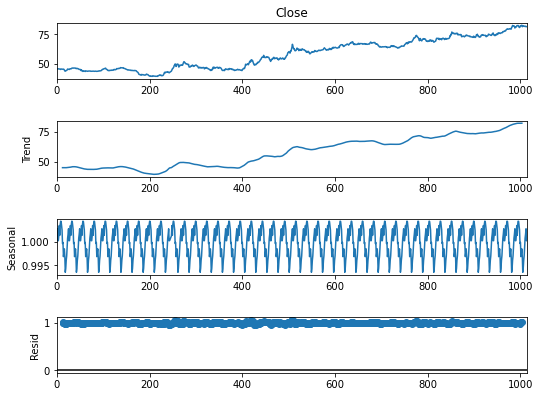

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=24)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(8, 6)
fig.show()

In [22]:
from pmdarima.arima import auto_arima
model = auto_arima(data['Close'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

(2, 1, 0)


In [25]:
p, d, q = 2, 1, 0

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data["Close"], order=(p, d, q), 
                seasonal_order=(p, d, q, 52))  
fitted = model.fit() 
print(fitted.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1013
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -905.797
Date:                            Wed, 31 May 2023   AIC                           1821.594
Time:                                    13:36:22   BIC                           1845.929
Sample:                                         0   HQIC                          1830.861
                                           - 1013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.026      1.194      0.233      -0.020       0.083
ar.L2          0.0643      0.026   

In [27]:
predictions = fitted.predict(len(data), len(data)+60)
print(predictions)

1013    81.732806
1014    81.886990
1015    82.180318
1016    82.607755
1017    82.474242
          ...    
1069    84.906870
1070    85.402526
1071    85.520221
1072    85.830551
1073    85.687358
Name: predicted_mean, Length: 61, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [30]:
# Create figure
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title="INR Rate - Training Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend_title="Data",
    width=900,
    height=600
)

pio.show(fig)